## Integrantes - Grupo 10
Daniela Higuita Alcaraz  
Jose Angel Salazar Hernandez  
David Velásquez Mejía  
Carlos Mario Estrada Puerta  
Manuel David Marín Gallego  


# Primera Entrega Visión Artificial - 2019 01  

# Módulo 1  

## 1 Imagen de barra de colores  

### a) Generación de Imagen  



Lossy conversion from float64 to uint8. Range [0.0, 255.0]. Convert image to uint8 prior to saving to suppress this warning.
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


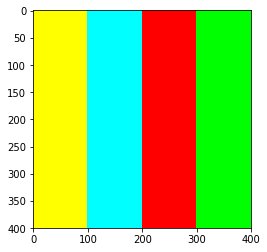

In [0]:
#Importar las librerias necesarias
%matplotlib inline
import imageio
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, color

#Se crea una variable que contendrán las "tres matrices" de la imagen, una para cada canal
imagen = np.zeros([400,400,3])

for h in range(400): #Se recorren todas las filas de las matrices
    
    #Se saturan los canales Rojo y Verde para generar un Amarillo,en las 100 primeras columnas de las matrices
    for k in range(100): 
        imagen[:,:,0][h][k] = 255.0
        imagen[:,:,1][h][k] = 255.0
        imagen[:,:,2][h][k] = 0.0
        
    #Para las siguientes 100 columnas, se saturan los canales Verde y Azul para generar un Cyan
    for k in range(100,200): 
        imagen[:,:,0][h][k] = 0.0
        imagen[:,:,1][h][k] = 255.0
        imagen[:,:,2][h][k] = 255.0
    
    #En las otras 100 columnas se satura solo el canal Rojo
    for k in range(200,300):
        imagen[:,:,0][h][k] = 255.0
        imagen[:,:,1][h][k] = 0.0
        imagen[:,:,2][h][k] = 0.0
    
    #Y en las últimas 100 columnas se satura el canal Verde
    for k in range(300,400):
        imagen[:,:,0][h][k] = 0.0
        imagen[:,:,1][h][k] = 255.0
        imagen[:,:,2][h][k] = 0.0

    #Se muestra la imagen generada con el comando plt.imshow
imageio.imwrite("res/imagenrgb.jpg",imagen)
_=plt.imshow(imagen,cmap='gray')


### b) Separación en canales e histogramas  


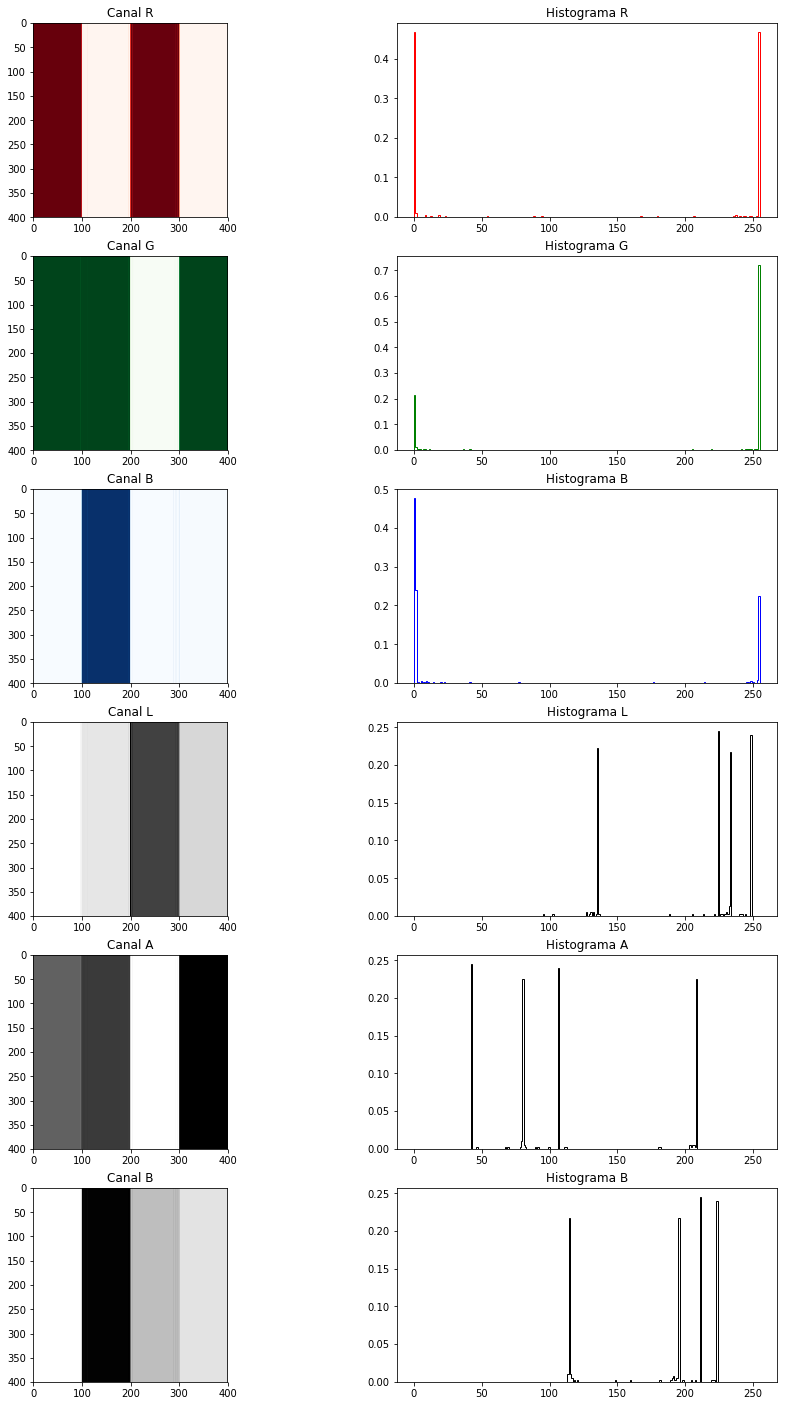

In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


#Leemos la imagen
img = cv2.imread("res/imagenrgb.jpg", cv2.IMREAD_COLOR)

#Convertimos la imagen al espacio RGB y extraemos sus canales
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_R = img_rgb[:,:,0]
img_G = img_rgb[:,:,1]
img_B = img_rgb[:,:,2]

#Convertimos la imagen al espacio LAB y extraemos sus canales
img_lab  = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_Bl = img_lab[:,:,2]

#Creamos algunas listas con Títulos, colores y el orden de las imágenes
titulos=[["Canal R","Histograma R"],["Canal G", "Histograma G"],["Canal B","Histograma B"],["Canal L","Histograma L"],["Canal A", "Histograma A"],["Canal B","Histograma B"]]
imagenes=[img_R,img_G,img_B,img_L,img_A,img_Bl]
colors = ('r','g','b',"k","k","k")
cmaps = ("Reds","Greens","Blues","gray","gray","gray")

#Se crea un arreglo de subplots con 6 filas para los 6 canales y 2 columnas para la imagen e Histograma
fig, arreglo_plots = plt.subplots(6,2, figsize=(15, 25))

#Se muestran las imágenes en cada uno de sus canales en la primer columna del arreglo de sub plots y sus histogramas en la 2da
for i in range(len(imagenes)):
    
    arreglo_plots[i,0].imshow(imagenes[i], cmap=cmaps[i])
     
    img_array_i = imagenes[i].ravel()
    arreglo_plots[i,1].hist(img_array_i,histtype='step', bins=255, range=(0.0, 255.0),normed=True, color=colors[i])
        
    for k in range(0,2):
               
        arreglo_plots[i,k].set_title(titulos[i][k])


In [35]:
#leemos las imagens de los espacios de color
RGB = cv2.imread('res/RGB.PNG', cv2.IMREAD_COLOR)
LAB = cv2.imread('res/LAB.PNG', cv2.IMREAD_COLOR)
LAB = cv2.cvtColor(LAB, cv2.COLOR_BGR2RGB)
HSV = cv2.imread('res/HSV.PNG', cv2.IMREAD_COLOR)

#### Análisis  

##### Espacio de color LAB:
Antes de analizar cada canal de la imagen es importante definir cómo funciona este espacio de color, L representa la luminosidad de la imagen, A representa las coordenadas entre rojo/verde y B representa las coordenadas entre amarillo/azul como se presenta en la siguiente imagen, tomada de http://sensing.konicaminolta.com.mx/2014/09/entendiendo-el-espacio-de-color-cie-lab/


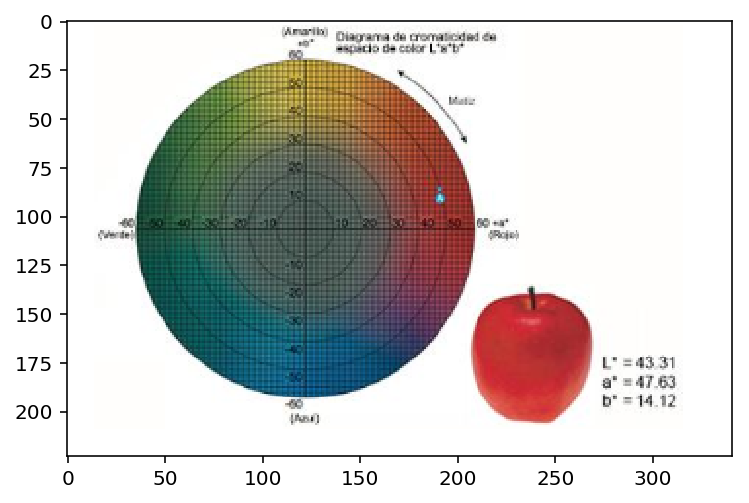

In [34]:
plt.imshow(LAB)

##### Canal L (luminosidad):
El histograma nos muestra que existe una concentración de píxeles aproximadamente en los valores 140, 225, 230 y 250, de esto podemos inferir que el color rojo de nuestro arreglo tiene un nivel medio de luminosidad y que los otros 3 colores tienen altos niveles de luminosidad.

##### Canal A (Rojo/Verde):
Este histograma nos permite identificar fácilmente los colores Rojo y Verde, en este caso como se presenta la imagen en escala de grises, entre más rojo sea el color más blanco será la columna en la imagen y entre más verde sea el color, más negro será en la imagen, esto cobra sentido haciendo la comparación con la configuración que se realizó en RGB para producir esta imagen. También es posible inferir que esta imagen contiene una mayor cantidad de color Verde debido a los valores presentes en el histograma ya que 3 de las columnas del histograma están a la izquierda de este. A continuación, se mostrará la configuración de estas columnas en RGB.

##### columna 2
for k in range(200,300):  
        imagen[:,:,0][h][k] = 255  saturado en  rojo equivale al mayor valor en A de LAB         
        imagen[:,:,1][h][k] = 0     
        imagen[:,:,2][h][k] = 0     
##### columna 3
for k in range(300,400): 
        imagen[:,:,0][h][k] = 0    
        imagen[:,:,1][h][k] = 255 saturado en verde equivale al menor valor en A de LAB    
        imagen[:,:,2][h][k] = 0   

##### Canal B (Amarillo/Azul):
En este caso el proceso es el mismo que se ha realizado en el canal A, pero con los colores Amarillo y azul, nuestra imagen tiene la primera columna amarilla y la segunda azul, por lo que siguiendo el análisis del canal anterior el color Amarillo equivale al color blanco en la escala de grises y el color Azul equivale al negro en la escala de grises lo cual coincide con la imagen del canal B de nuestra imagen en escala de grises, también del mismo modo como los valores en el histograma se encuentran más a la derecha significa que la imagen tiene un alto contenido de Amarillo.


## Espacio de color RGB
Del mismo modo es importante definir este espacio de color, en este caso cada canal es un único color, R rojo (en inglés Red), G verde (en inglés Green) y B azul (en inglés Blue), a continuación se presenta una repesentación gráfica de este espacio, tomada de: http://leidyvpm.blogspot.com/2011/05/modo-de-color.html


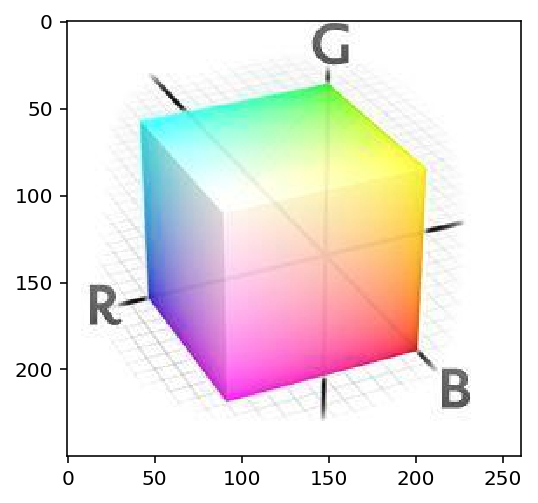

In [36]:
plt.imshow(RGB)

### Canal R rojo:
En este caso tanto las gráficas como los histogramas son más contundentes con la información que nos ofrecen, de la gráfica se infiere que los colores que se encuentran en las columnas 1 y 3 están completamente saturados en este canal, lo que tiene sentido ya que la primera columna es de color amarillo que en este espacio de color se obtiene saturando el color rojo y el color verde y la columna 3 es de color rojo que redundantemente se obtiene saturando solo el canal rojo, del mismo modo los otros 2 colores (cian y verde) se obtienen cuando no hay presencia del color rojo, todo esto puede evidenciarse en las aristas del cubo que se ha presentado anteriormente. En el caso del histograma se evidencia que los valores se reparten equitativamente en los valores 0 y 255, lo que indica que la mitad de las columnas están saturadas en rojo y la otra mitad tienen ausencia de rojo, lo que concuerda con el análisis anterior

### Canal G verde:
El procedimiento en este caso es el mismo que el realizado en el canal anterior, en este caso tanto el diagrama como el histograma nos muestran que 3 de las columnas están saturadas en este canal, en el diagrama tenemos que estas columnas son las 1,2 y 4 que corresponden a los colores amarillo, cian y verde, respectivamente lo que tiene sentido ya que el amarillo es la combinación del verde con el rojo y el cian es la combinación del verde con el azul, dentro del histograma esto se evidencia ya que los valores se concentran en los valores 0 y 255, pero en este caso la concentración es mayor en 255 lo que implica una mayor presencia de verde lo que concuerda con el hecho de que tenemos 3 de 4 columnas saturadas en este canal.
 
### Canal B azul:
El procedimiento en este caso es el mismo que en los 2 canales anteriores, pero en este caso con el color azul, el diagrama nos muestra que solo uno de los colores está saturado en este canal, el cual pertenece al color cian obtenido de combinar azul y verde, los otros 3 colores se obtienen sin la necesidad de usar azul ya que son propios de los otros 2 canales (R y G) y su combinación, el análisis del histograma es el mismo que en canal anterior la diferencia es que como la cantidad de azul es poca (1 de 4 columnas) la concentración de valores es mayor en 0 que representa una mayor ausencia de este color.


### c) Torre Eiffel  

#### i) Redimensionamiento de imagen

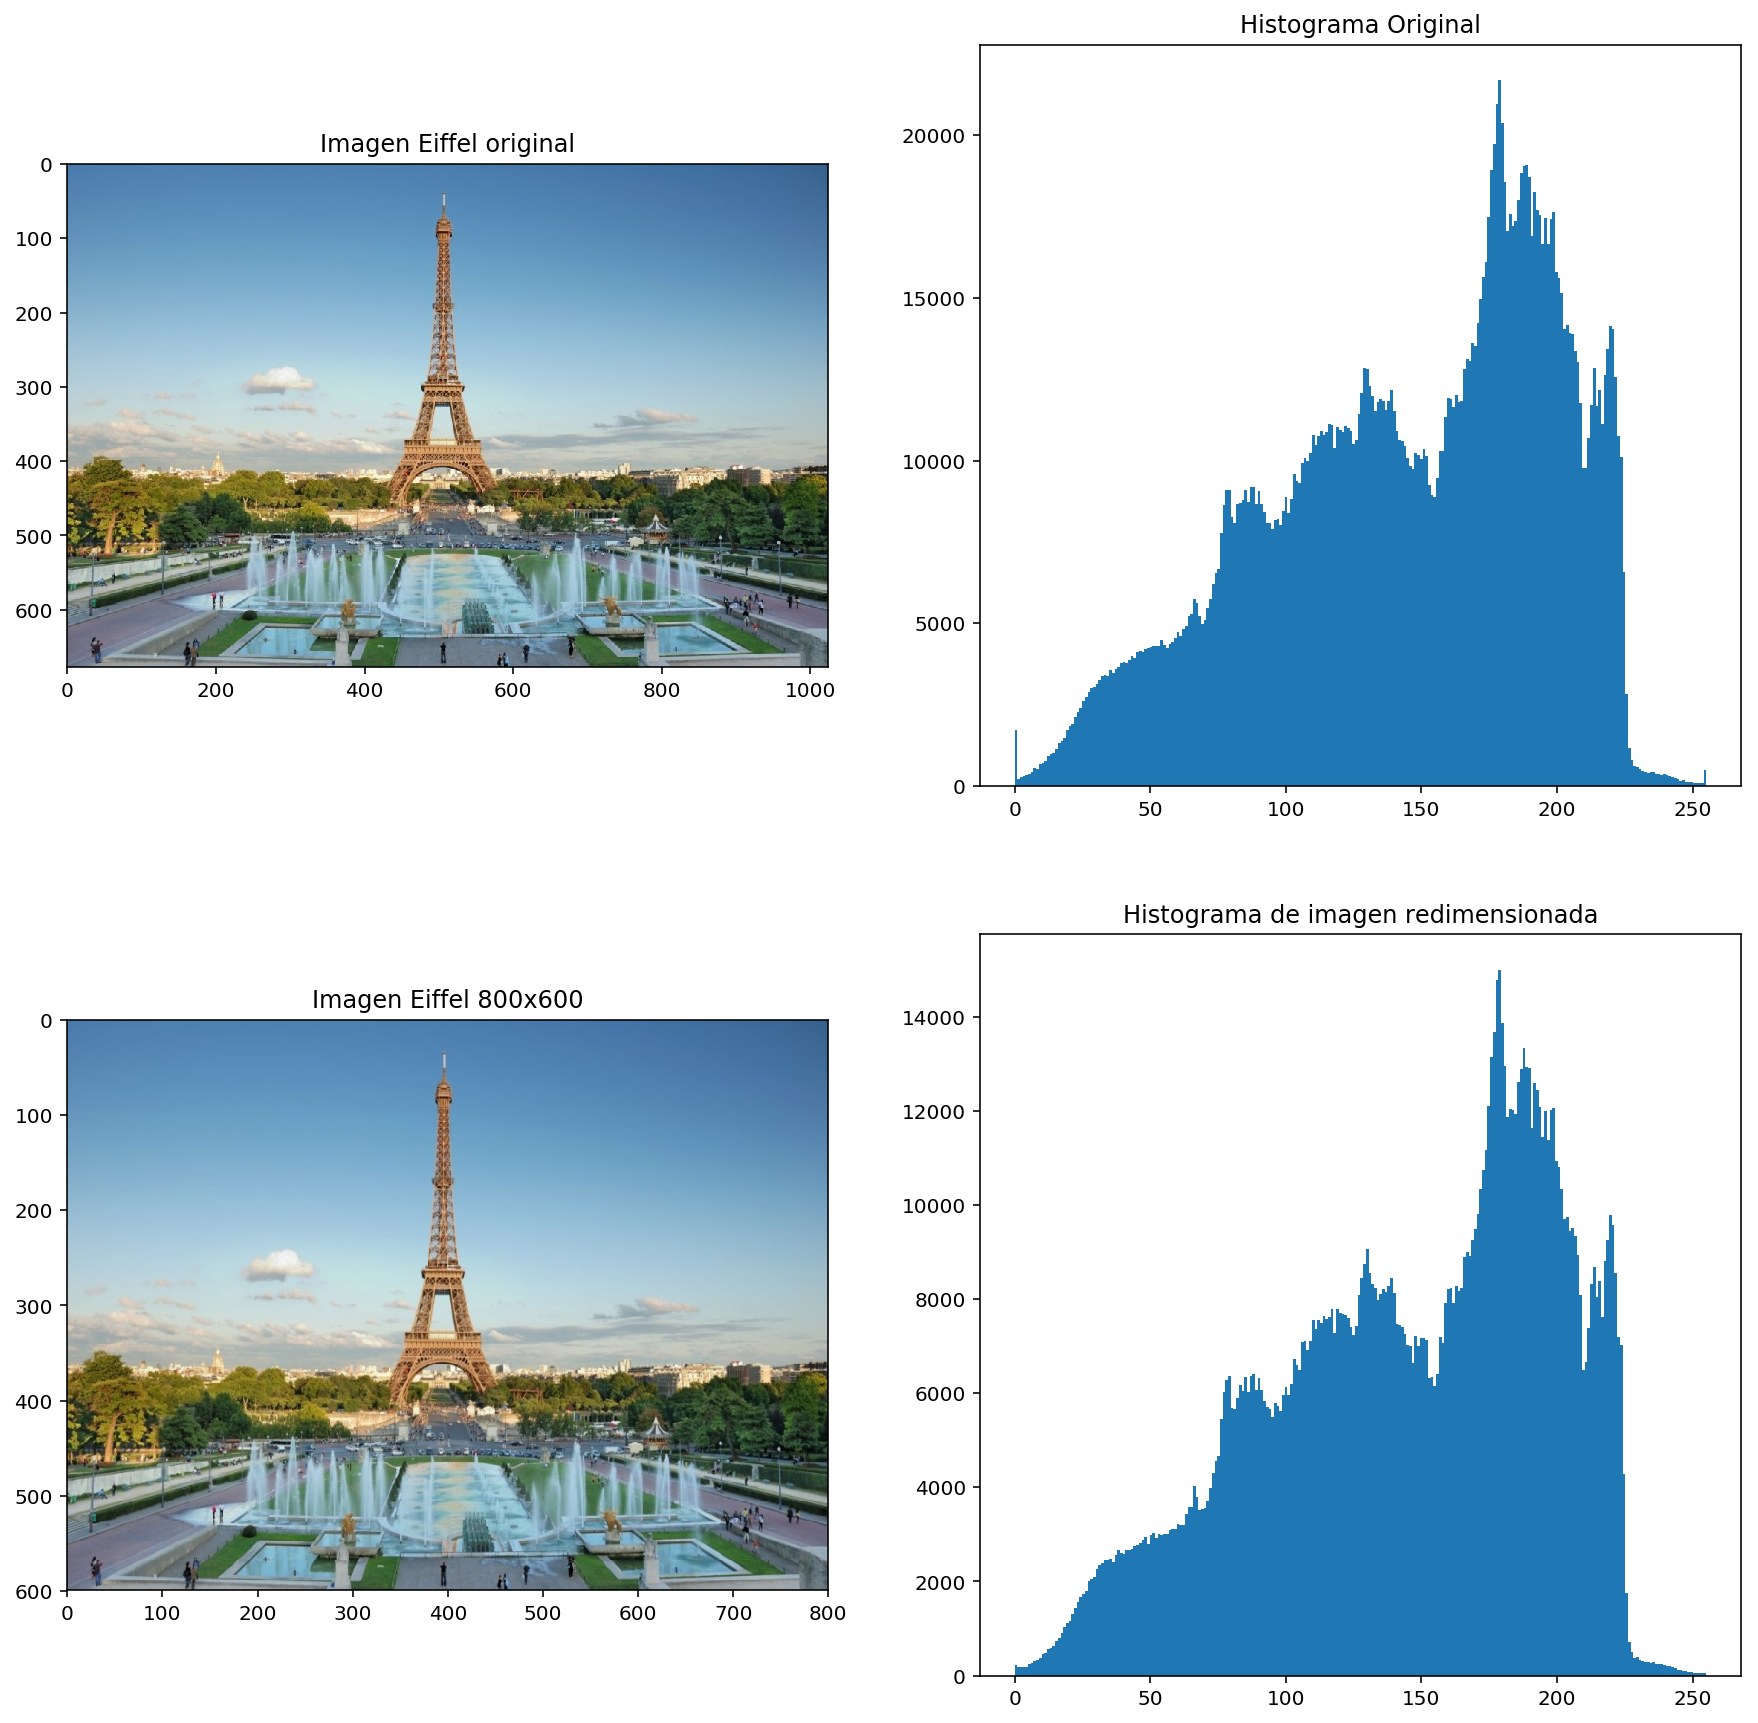

In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#Leemos la imagen y la convertimos al espacio de color RGB
eiffel = cv2.imread('res/eiffel.jpg', cv2.IMREAD_COLOR)
eiffel = cv2.cvtColor(eiffel, cv2.COLOR_BGR2RGB)

#Se genera un arreglo para imprimir las imágenes, 2x2
fig, arreglo_plots = plt.subplots(2,2,figsize=(15, 15))


#Título del cuadro en la posición (0,0)
arreglo_plots[0,0].set_title('Imagen Eiffel original')

#Imprimir la imagen original en la posición (0.0) del arreglo
arreglo_plots[0,0].imshow(eiffel)

#Título del cuadro en la posición (0,1)
arreglo_plots[0,1].set_title('Histograma Original')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[0,1].hist(eiffel.ravel(), bins=256, range=(0.0, 255.0))

#Usando la función "resize", redimensionamos la imagen a 800x600 pixeles y luego la mostramos en su posición
eiffelResize = cv2.resize(eiffel,(800,600))
#Título del cuadro en la posición (0,0)
arreglo_plots[1,0].set_title('Imagen Eiffel 800x600')
#Imprimir la imagen 1 en la posición (0.0) del arreglo
arreglo_plots[1,0].imshow(eiffelResize)

#Mostramos histograma de imagen redimensioanda
#Título del cuadro en la posición (0,1)
arreglo_plots[1,1].set_title('Histograma de imagen redimensionada')
#Imprimir el histograma en la posición (0,1)
_ = arreglo_plots[1,1].hist(eiffelResize.ravel(), bins=256, range=(0.0, 255.0))

#### ii) Separación de canales en espacio HSV

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


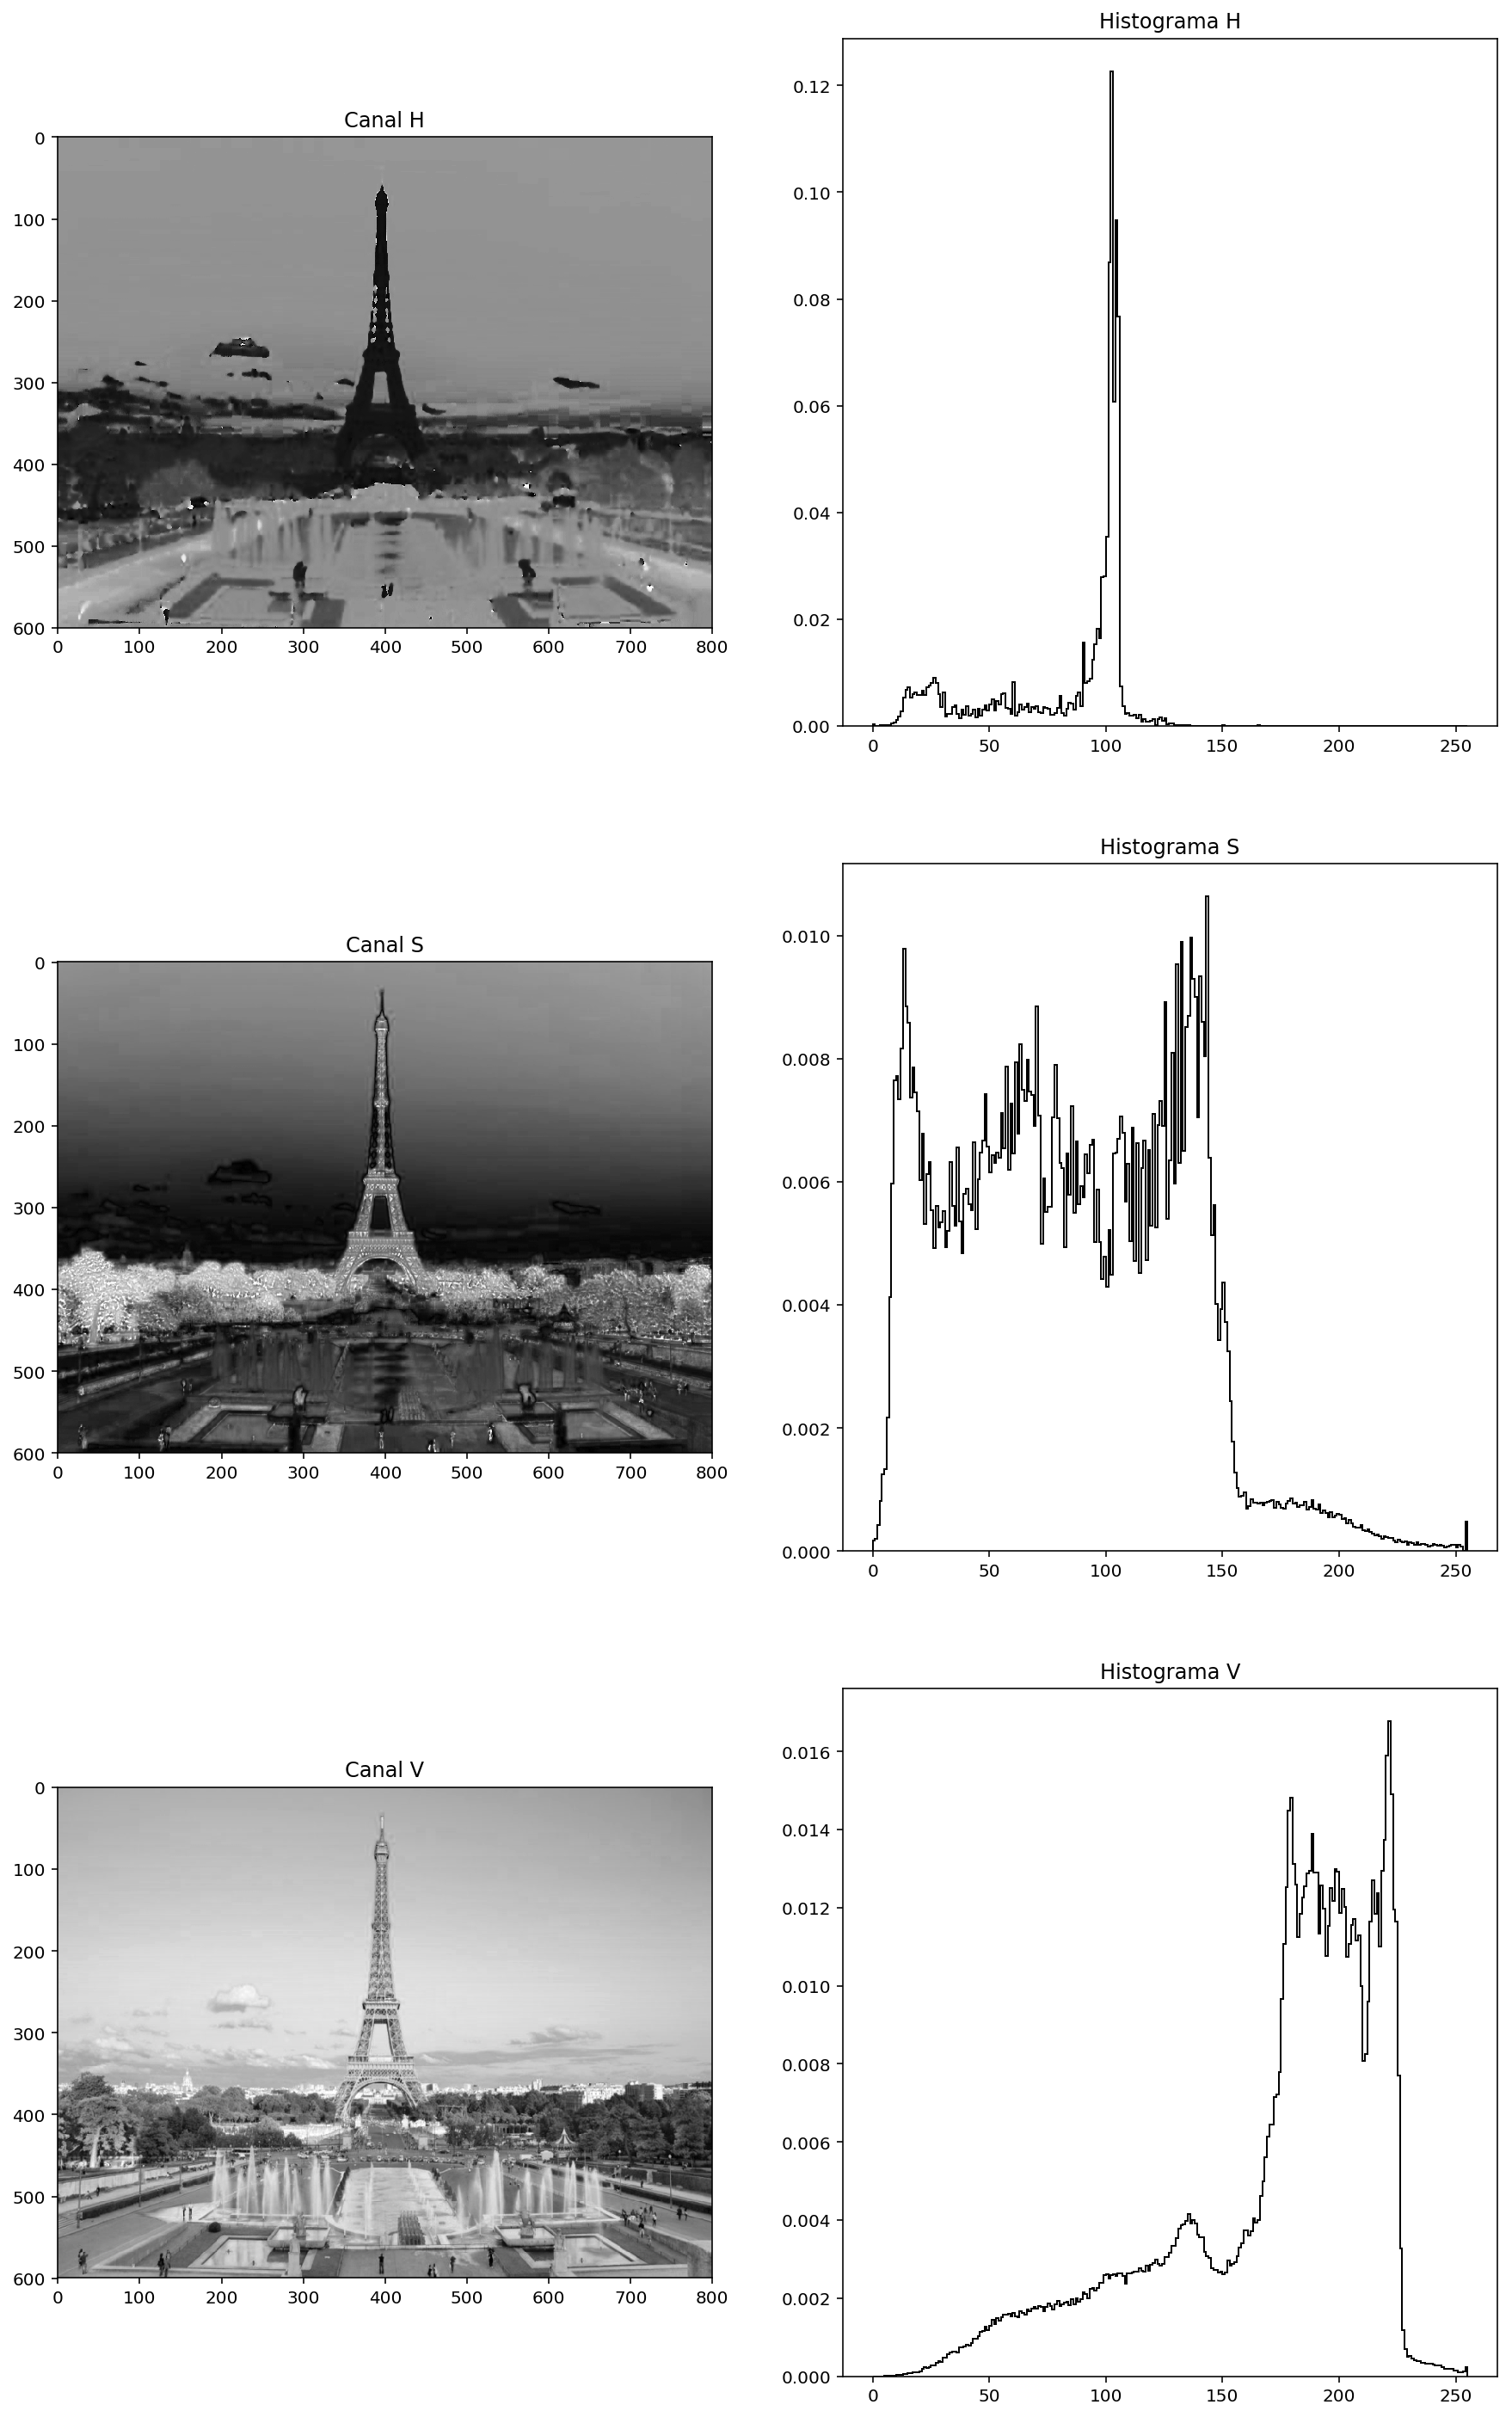

In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

eiffel = cv2.imread('res/eiffel.jpg', cv2.IMREAD_COLOR)

#Convertimos la imagen leida al espacio de color HSV (Hue, Saturation, Value)
eiffel_hsv  = cv2.cvtColor(eiffelResize, cv2.COLOR_RGB2HSV)
img_H = eiffel_hsv[:,:,0]
img_S =  eiffel_hsv[:,:,1]
img_V = eiffel_hsv[:,:,2]

#Mostramos la imagen separada en cada uno de los canales del espacio de color HSV y sus histogramas 

fig, arreglo_plots = plt.subplots(3,2, figsize=(15, 25))

titulos=[["Canal H","Histograma H"],["Canal S", "Histograma S"],["Canal V","Histograma V"]]
imagenes=[img_H,img_S,img_V]
colors = ("k","k","k")
cmaps = ("gray","gray","gray")


for i in range(len(imagenes)):
    #
    arreglo_plots[i,0].imshow(imagenes[i], cmap=cmaps[i])
     
    img_array_i = imagenes[i].ravel()
    arreglo_plots[i,1].hist(img_array_i,histtype='step', bins=255, range=(0.0, 255.0),normed=True, color=colors[i])
        
    for k in range(0,2):
               
        arreglo_plots[i,k].set_title(titulos[i][k])

## Análisis espacio de color HSV
Para el análisis de este punto se usa el espacio de color HSV, este espacio está compuesto por los canales Hue, Saturation, Value (Brightness) en el idioma inglés o en idioma español como Matiz, Saturación, Brillo. A diferencia de los espacios RGB y LAB que sus coordenadas son lineales, las del espacio HSV son no lineales, gráficamente se puede entender como un cono cilíndrico como se presenta a continuación, tomada de : https://es.wikipedia.org/wiki/Modelo_de_color_HSV#/media/Archivo:HSV_cone.jpg


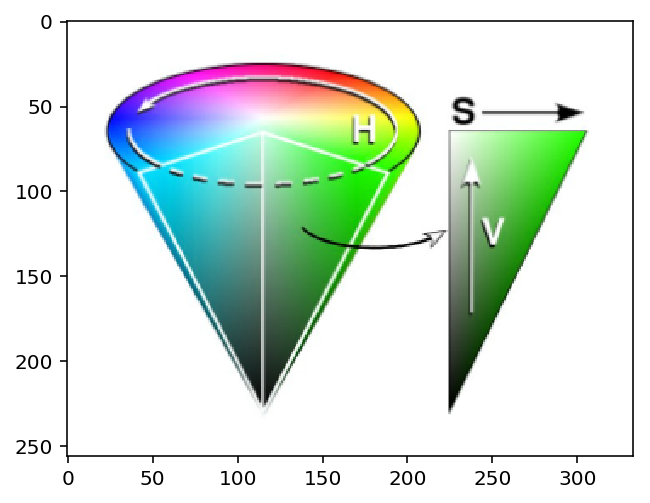

In [37]:
plt.imshow(HSV)

### Relación entre HSV y BGR
Antes de continuar con el análisis es necesario establecer la relación que tiene el espacio HSV con otro más familiar como el RGB, en el espacio HSV el color se encuentra en el canal H representado como un círculo medido en grados de 0° a 360° (cabe notar que para este caso 0° = 360°), alrededor de los 0° se encuentran los colores rojizos, alrededor de los 120° los colores verdes y alrededor de los 240° los azules.

### Canal H (matiz o tonalidad)
El histograma nos muestra un único pico, lo que nos lleva a interpretar de que en la imagen hay una gran presencia de un solo color, en este caso, del color azul que abarca todo el cielo, parte de las calles y el agua de la fuente y los otros valores más bajos del histograma en el rango 0-100 representan la presencia de los colores verdes cercanos al azul que se encuentran en los árboles.

### Canal S saturación
El histograma de este canal de saturación nos muestra que la mayoría de los valores están distribuidos por debajo de la media, lo que significa que los colores de esta imagen tienen una baja saturación 

### Canal V brillo
En este caso el canal V puede interpretarse como una escala de grises, por lo cual valores más cercanos a 255 en el histograma representan colores más claros o con mayor brillo y por el contrario los valores cercanos a 0 representan colores más oscuros o con menor brillo, como en el histograma los valores son están distribuidos mayormente por encima de la media se infiere que los colores de esta imagen son en su mayoría brillantes 

### Solución pregunta del caso

-¿Considera usted que sería fácil separar la torre Eiffel del fondo, con alguno de estos canales? Justifique.

R// Se considera que separar la torre del fondo en el espacio HSV puede ser más fácil en el canal H, la justificación es que los colores de los objetos en la foto son más diferenciables que la saturación o el brillo de los mismos, por ejemplo la imagen del canal S nos muestra que la saturación del color de la torre y de los árboles es muy similar y esto dificultaria la separación del fondo de la torre, en cambio en el canal H la diferencia entre el color de la torre contra los árboles o el cielo es más apreciable  

En conclusión se define que si es fácil separar la torre del fondo por medio del canal H identificando los valores de color que pertenecen a la torre y hacer una manipulación binaria con estos valores.



## 2 Montaje  

### a) Muestra de montaje  


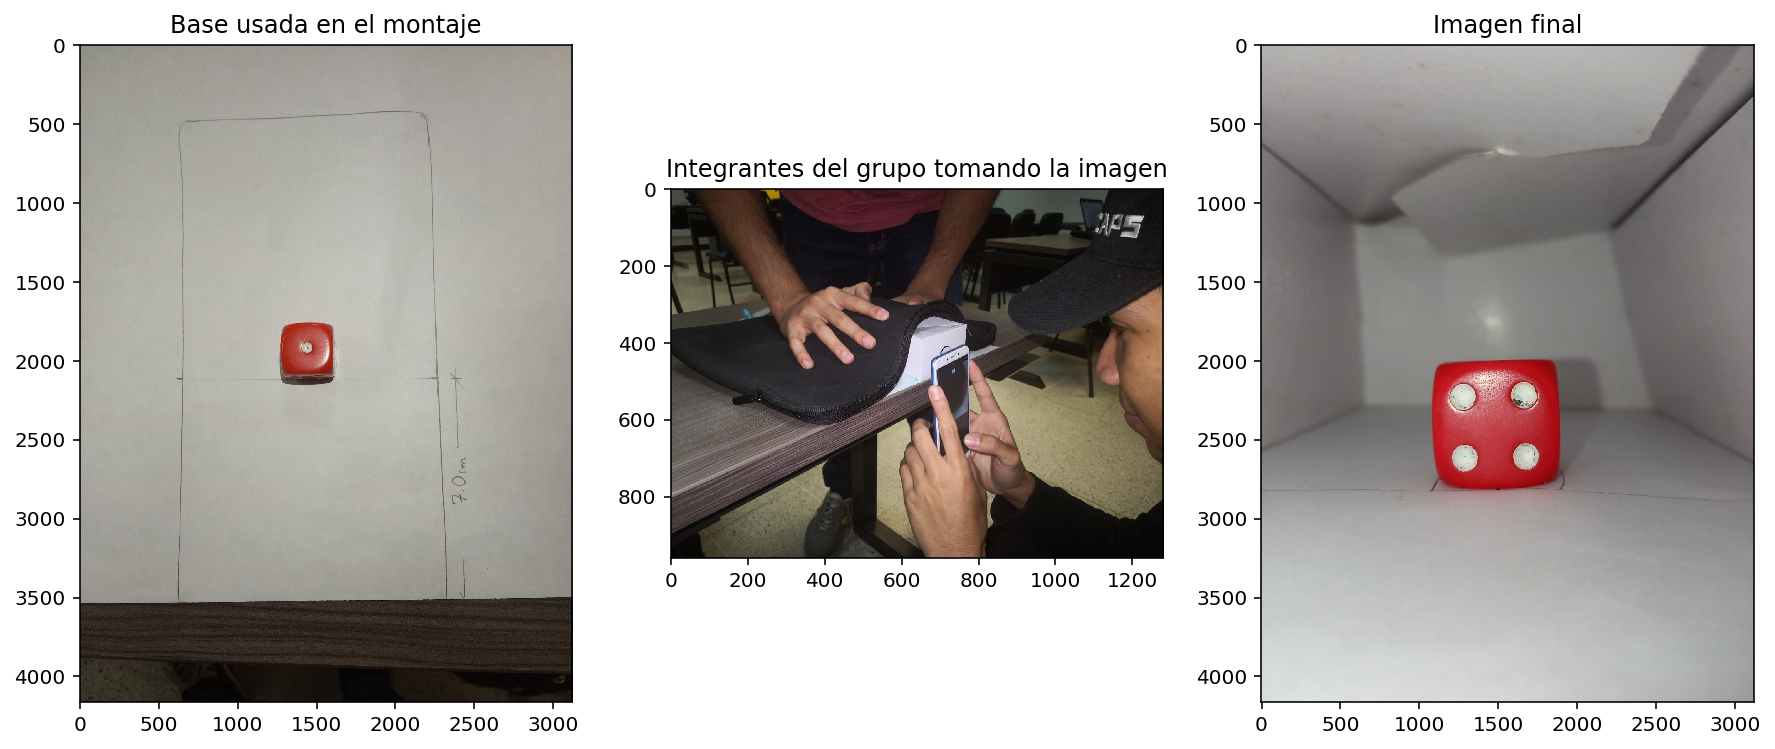

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

montaje1=cv2.cvtColor(cv2.imread("res/montaje1.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
montaje2=cv2.cvtColor(cv2.imread("res/montaje 2.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
dado = cv2.cvtColor(cv2.imread("res/dado.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
fig, arreglo_plots = plt.subplots(1,3, figsize=(15, 25))
arreglo_plots[0].set_title("Base usada en el montaje")
arreglo_plots[0].imshow(montaje1)
arreglo_plots[1].set_title("Integrantes del grupo tomando la imagen")
arreglo_plots[1].imshow(montaje2)
arreglo_plots[2].set_title("Imagen final")
arreglo_plots[2].imshow(dado);

### b) Descripción del montaje  


#### i) Dimensiones de la caja
    - Ancho: 8.3 cm  
    - Altura: 15.7 cm  
    - Largo 4.9 cm  
    - Radio del agujero: 1.05 cm  

#### ii) Dimensiones del objeto  

El objeto al cual se le tomaran las fotos es un dado color rojo de esquinas redondeadas  

    - Ancho = Alto = Profundidad: 1.6 cm  
    - Proporción Lado/altura de caja: 0,10119  

#### iii) Medidas del montaje  

    - Distancia entre el lente y el objeto: 7 cm  
    - Proporción Distancia a objeto/altura caja: 0.4458  

#### iv) Características de la cámara  

El dispositovo con el cual se tomaron las fotos es un Xioami Redmi 6A, el cual cuenta con una cámara de 13 megapixeles con flash LED integrado, sensor CMOS, y una apertura de f/2.2. No se uso ningun lente especial.

Los detalles de la foto tomada son:

    - Tamaño: 3120 píxeles*4160 píxeles
    - Velocidad de obturación: 1/30 seg
    - ISO: 112



### c) Analisis de los canales


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


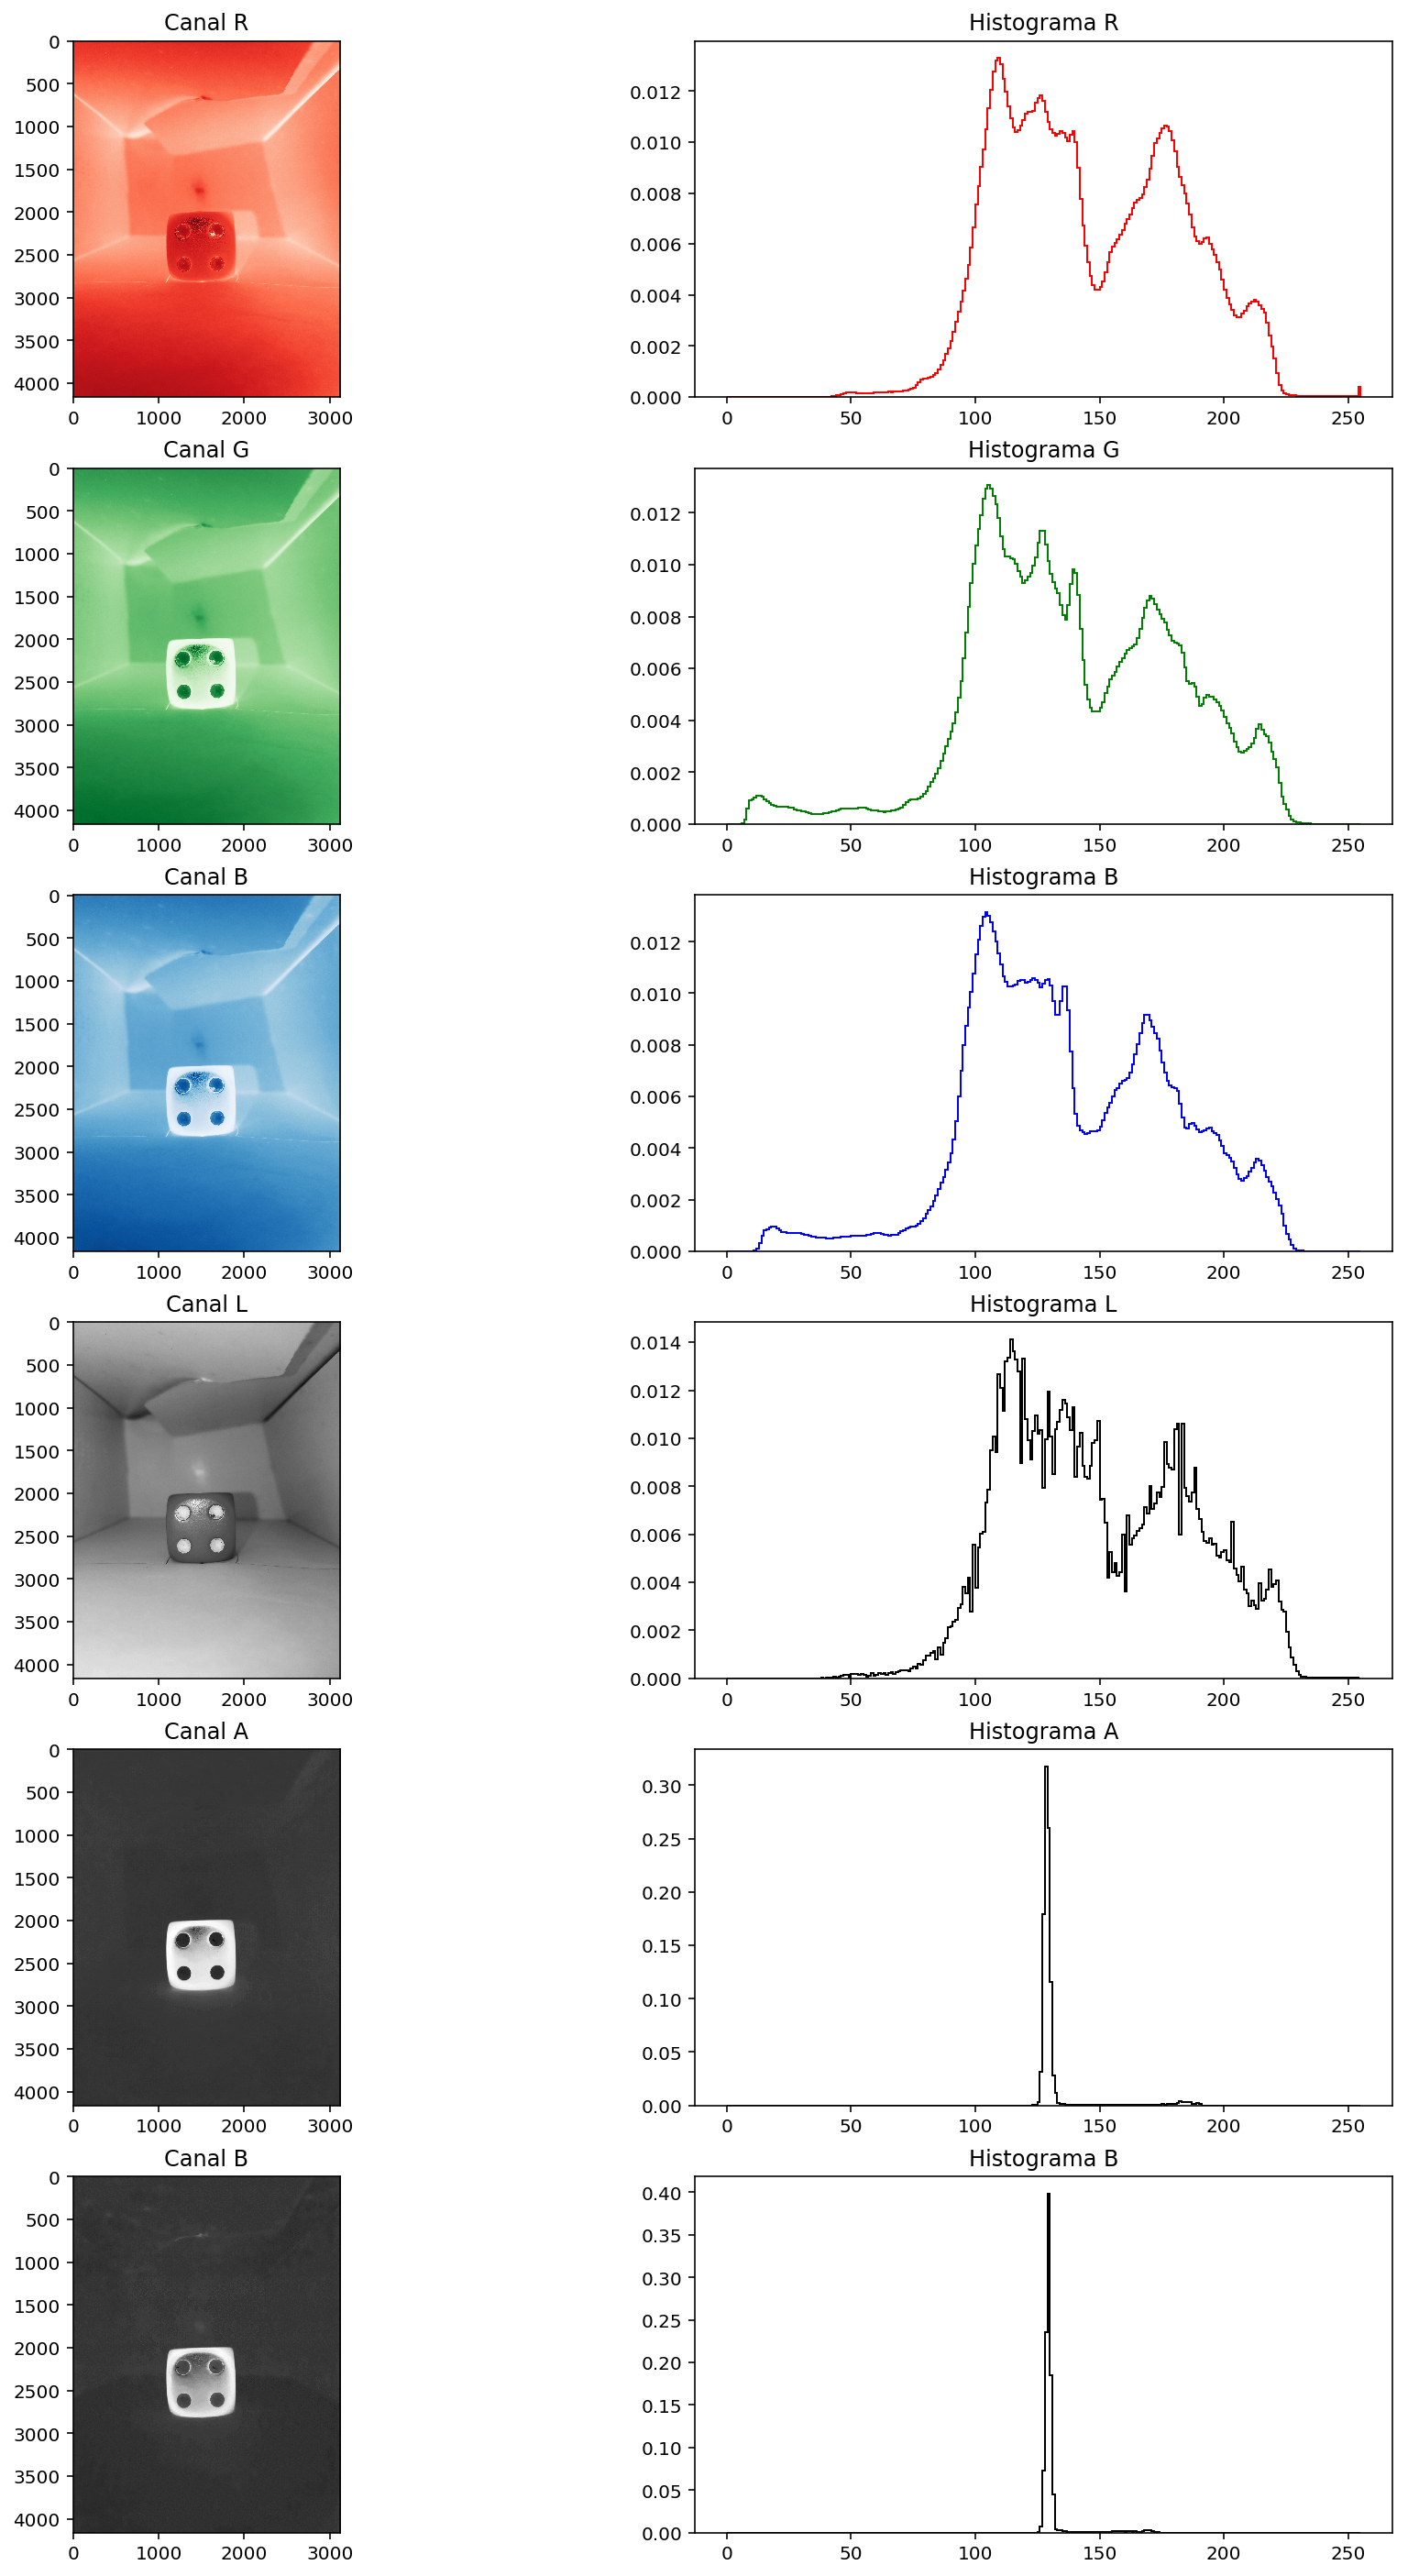

In [4]:
#Extraemos sus canales RGB
img_R = dado[:,:,0]
img_G = dado[:,:,1]
img_B = dado[:,:,2]

#Convertimos la imagen al espacio LAB y extraemos sus canales
img_lab  = cv2.cvtColor(cv2.imread("res/dado.jpg",cv2.IMREAD_COLOR),cv2.COLOR_BGR2LAB)
img_L = img_lab[:,:,0]
img_A =  img_lab[:,:,1]
img_Bl = img_lab[:,:,2]

#Creamos algunas listas con Títulos, colores y el orden de las imágenes
titulos=[["Canal R","Histograma R"],["Canal G", "Histograma G"],["Canal B","Histograma B"],["Canal L","Histograma L"],["Canal A", "Histograma A"],["Canal B","Histograma B"]]
imagenes=[img_R,img_G,img_B,img_L,img_A,img_Bl]
colors = ('r','g','b',"k","k","k")
cmaps = ("Reds","Greens","Blues","gray","gray","gray")

#Se crea un arreglo de subplots con 6 filas para los 6 canales y 2 columnas para la imagen e Histograma
fig, arreglo_plots = plt.subplots(6,2, figsize=(15, 25))

#Se muestran las imágenes en cada uno de sus canales en la primer columna del arreglo de sub plots y sus histogramas en la 2da
for i in range(len(imagenes)):
    
    arreglo_plots[i,0].imshow(imagenes[i], cmap=cmaps[i])
     
    img_array_i = imagenes[i].ravel()
    arreglo_plots[i,1].hist(img_array_i,histtype='step', bins=255, range=(0.0, 255.0),normed=True, color=colors[i])
        
    for k in range(0,2):
               
        arreglo_plots[i,k].set_title(titulos[i][k]);

#### Elección del canal
Se usaron los espacios de color RGB y LAB para ver en cada uno de ellos cual podría ser el canal indicado para disminuir las sombras de la imagen y que se aprecien mejor los colores del objeto.

Tras ver la imagen en cada uno de los canales con su respectivo histograma, se llega a la conclusión de elegir el canal A del espacio de color LAB, donde el objeto se ve totalmente blanco y las sombras que se veían en el fondo han desaparecido por completo, y el histograma no muestra mucha disperción. El canal B se ve similar al canal A pero en este último el color blanco representa el rojo, que es el color de nuestro objeto, por tanto es más acertado elegir este canal; por otro lado en el canal B el blanco representa el amarillo, en este caso que el objeto se vea blanco puede ser debido a que el amarrillo tiene algo de rojo. 

En el espacio de color RGB continuaba existiendo gran presencia de las sombras en la imagen y los histogramas tenían bastante disperción.


# Módulo 2  

## 1) Transformaciones  

### a)


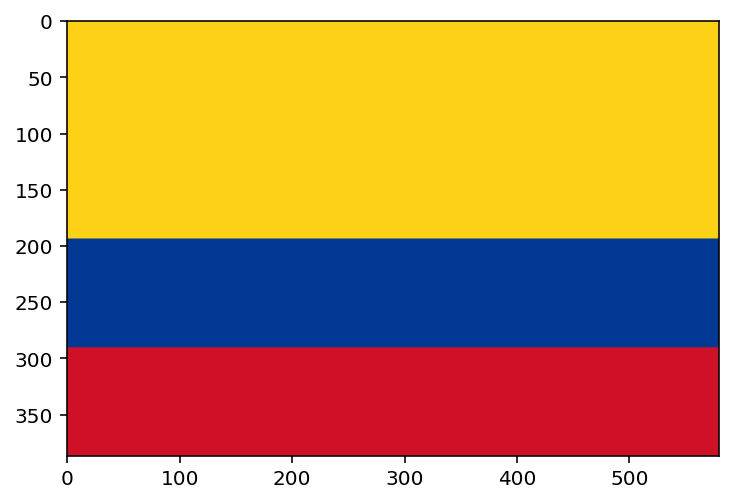

In [47]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread("res/col.png", cv2.IMREAD_COLOR)
img_rgb  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb,cmap='gray')


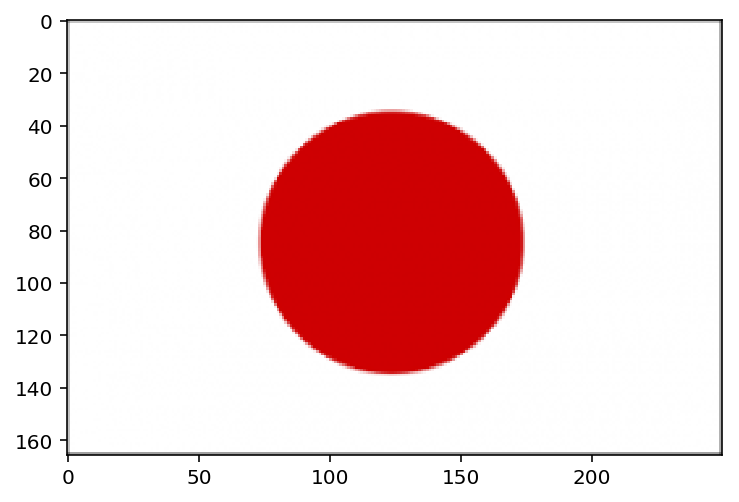

In [46]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img_jap = cv2.imread("res/jap.png", cv2.IMREAD_COLOR)
img_rgb_jap  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb_jap,cmap='gray') #


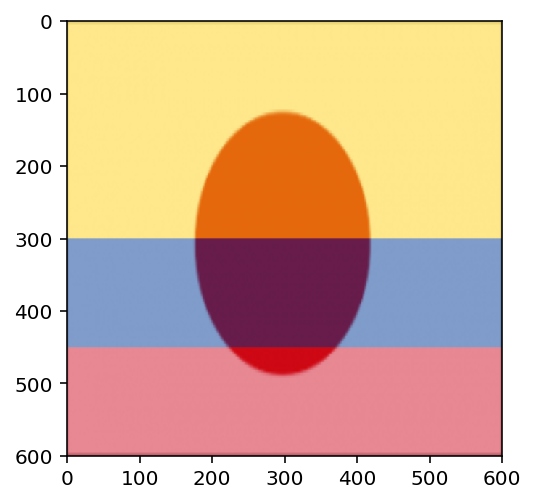

In [20]:
from skimage import io, color
import numpy as np
import cv2
import matplotlib.pyplot as plt

img_col = cv2.cvtColor(cv2.imread('res/col.png'), cv2.COLOR_BGR2RGB) #I1
img_jap = cv2.cvtColor(cv2.imread('res/jap.png'), cv2.COLOR_BGR2RGB) #I2


col_rsz = cv2.resize(img_col,(600,600)) #Es necesario redimensionar las imagenes para poderlas sumar
jap_rsz = cv2.resize(img_jap,(600,600))

#img_add_xxx es una matriz de ceros del mismo tamaño de la imagen original, corresponde a una copia para editar.
#el tipo de dato debe ser uint8 para estar entre 0 y 255
img_mult_col = np.zeros(col_rsz.shape, np.uint8)
img_mult_jap = np.zeros(jap_rsz.shape, np.uint8)

k = 0.5

tr1 = 1-k

img_mult_col[:,:,0] = cv2.multiply(col_rsz[:,:,0], tr1)
img_mult_col[:,:,1] = cv2.multiply(col_rsz[:,:,1], tr1)
img_mult_col[:,:,2] = cv2.multiply(col_rsz[:,:,2], tr1)

img_mult_jap[:,:,0] = cv2.multiply(jap_rsz[:,:,0], k)
img_mult_jap[:,:,1] = cv2.multiply(jap_rsz[:,:,1], k)
img_mult_jap[:,:,2] = cv2.multiply(jap_rsz[:,:,2], k)

#𝐺(𝑥,𝑦)=(1−𝑘)∗𝐼1(𝑥,𝑦)+𝑘∗𝐼2(𝑥,𝑦)  <--- TRANSFORMACION APLICADA A LAS IMAGENES

#I(x,y) = img
plt.imshow(img_mult_col + img_mult_jap)

## Análisis Punto A

### Cuando K = 1

    - La imagen 1 que corresponde a la bandera de colombia, queda completamente negra, lo que significa una ausencia completa de brilla, pues esta queda multiplicada por cero, y la imagen 2 queda multiplicada por 1, lo que hace que esta quede igual, al suporponerlas se suma a la matriz de la imagen 1 los valores de la imagen 2, mostrando solo los valores de la imagen 2, pues la matriz 1 (imagen1) quedo en 0.

### Cuando K = 0

    - Sucede lo mismo que en el caso anterior, solo que en este caso solo se muestra la bandera de colombia(imagen1), pues la imagen2 (matriz) quedo en ceros.

### Cuando K = 0.5
    - Multiplicar por 0.5 es equivalente que dividir por 2, por lo tanto se suman 2 imagenes donde sus histogramas se contraen en un factor de 2. Lo que en teoría significa disminución de los niveles de intensidad para cada imagen en cuestion. La suma las superpone. En términos de diseño, esto equi


### b) Transformacion a la Imagen 1 𝐺(𝑥,𝑦)=𝑎∗𝐼1(𝑥,𝑦)+𝑏

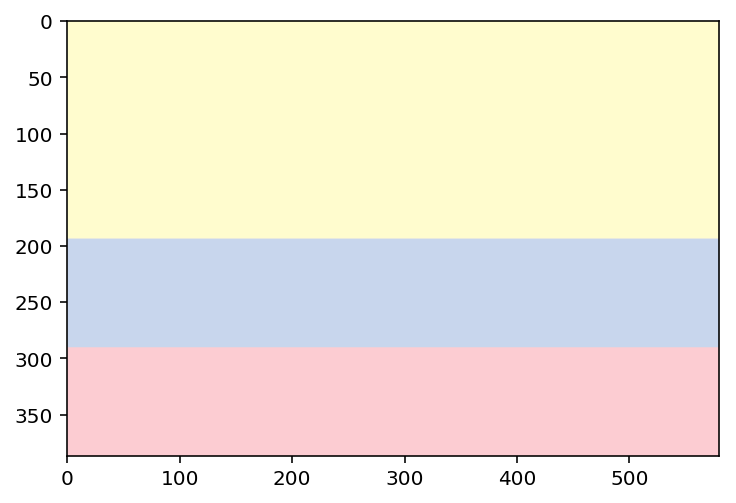

In [46]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.cvtColor(cv2.imread('res/col.png'), cv2.COLOR_BGR2RGB)

a = 0.25

b = 200

img_mult = np.zeros(img.shape, np.uint8)
img_add = np.zeros(img.shape, np.uint8)

img_mult[:,:,0] = cv2.multiply(img[:,:,0], a) #Primero multiplico la imagen por a
img_mult[:,:,1] = cv2.multiply(img[:,:,1], a)
img_mult[:,:,2] = cv2.multiply(img[:,:,2], a)

img_add[:,:,0] = cv2.add(img_mult[:,:,0], b) # el resultado de la multiplicacion le sumo b
img_add[:,:,1] = cv2.add(img_mult[:,:,1], b)
img_add[:,:,2] = cv2.add(img_mult[:,:,2], b)

plt.imshow(img_add)


### Análisis Punto B

#### Cuando a=0 y b es cualquier valor

    - Lo que ocurre en este caso es que los 3 canales van a 0, lo que significa ausencia total de brillo. Y al sumar un valor, queda una imagen con un color uniforme en escala de grises.
    
#### Cuando a=1 y b es cualquier valor

    - Al multiplicar la imagen por 1, se conserva la información de todos los canales, y al sumar, lo que sucede es que se aumenta el brillo de la imagen.
    
#### Cuando a=0.25 y b= 200 (valor que experimentamos)

    - Lo que sucede aquí es que al multiplicar por 0.25 equivale a dividir por 1/4, lo que hace que el histograma se contrae en un factor de 4. Adicional se le suman 200, lo cual incrementa el brillo.

## 2) Detección de bordes

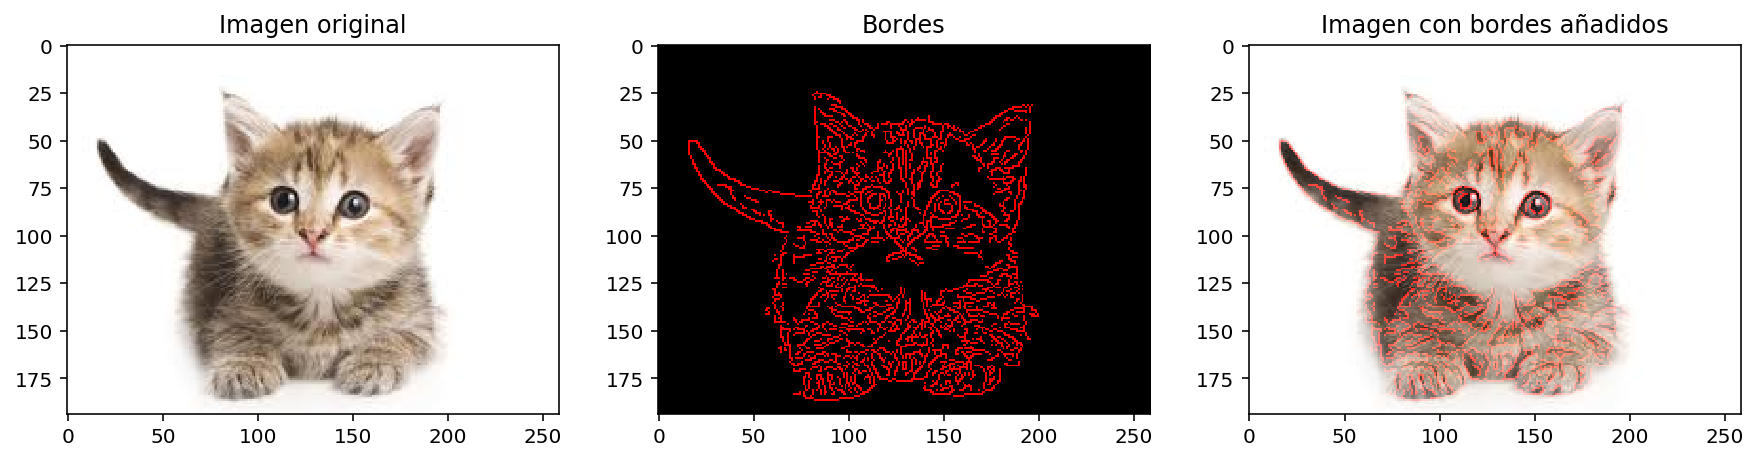

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#Leemos nuestra imagen
im_gato=cv2.imread("res/gato.jpg",cv2.IMREAD_COLOR)
im_gato=cv2.cvtColor(im_gato,cv2.COLOR_BGR2RGB)

#Creamos imagen de bordes con la función Canny y convertimos a RGB para poder operar

#    La función Canny usa, además de la imagen, dos variables más, las cuales son umbrales con los que se decide qué se considera borde y qué no, según la intensidad
#    de los gradientes. Si algo está por encima del umbral máx, se considera borde. Si algo está por debajo del umbral, se descarta. Algo que esté entre los umbrales
#    se definirá borde o no borde según si están o no están conectados con pixeles que fueron considerados bordes

bordes=cv2.Canny(im_gato,100,150)
bordes=cv2.cvtColor(bordes,cv2.COLOR_GRAY2RGB)
bordes[:,:,1:3]=0  #Llevamos los valores de los canales Verde y Azul a cero, para volver Rojo el borde


#Creamos el arreglo de subplots
fig, arreglo_subplots=plt.subplots(1,3,figsize=(15,25))

#Mostramos las imágenes en el arreglo de subplots
_=arreglo_subplots[0].imshow(im_gato,cmap="gray")
_=arreglo_subplots[1].imshow(bordes,cmap="gray")
_=arreglo_subplots[2].imshow(cv2.add(im_gato,bordes),cmap="gray")

_=arreglo_subplots[0].set_title("Imagen original")
_=arreglo_subplots[1].set_title("Bordes")
_=arreglo_subplots[2].set_title("Imagen con bordes añadidos")

